In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=1.6
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqhyperb=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqhyperb)

angle 0.0
1.6
(array([3.14159265, 0.        ]), 0.0, 50, 1.6, array([1., 1.]))


In [5]:
import getxyuvtwohyperb_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqhyperb=getxyuvtwohyperb_apper.getxyuveqtwohyperbolas(initdateqhyperb,useperihelion)
print(xyuvaeqhyperb)
masses,xvec,avec=xyuvaeqhyperb

initdat 50 [3.14159265 0.        ] 1.6 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-50.        ,   0.        ,   0.        ,  -0.        ,
         -0.12649111,   0.        ],
       [ 50.        ,   0.        ,   0.        ,  -0.        ,
          0.12649111,   0.        ]]), array([[ 0.0001, -0.    ,  0.    ],
       [-0.0001, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqhyperb
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-50.           0.           0.          -0.          -0.12649111
    0.        ]
 [ 50.           0.           0.          -0.           0.12649111
    0.        ]] 0.0
[1. 1.] [[-50.           0.           0.          -0.          -0.12649111
    0.        ]
 [ 50.           0.           0.          -0.           0.12649111
    0.        ]] 0.0


In [12]:
print(xyuvaeqhyperb)

(array([1., 1.]), array([[-50.        ,   0.        ,   0.        ,  -0.        ,
         -0.12649111,   0.        ],
       [ 50.        ,   0.        ,   0.        ,  -0.        ,
          0.12649111,   0.        ]]), array([[ 0.0001, -0.    ,  0.    ],
       [-0.0001, -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import hyperbfns

In [16]:
numsteps=5000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqhyperb,outputevery,delta)

0.01
[-1.50000048e-08  1.26491106e-03  0.00000000e+00]
[2.25000144e-16 1.60000000e-06 0.00000000e+00]
1.5999999994783337e-06
0.001264911063861145
118.5854122756461 False
0.029699581275620744
[-1.62009350e-07  3.75673288e-03  0.00000000e+00]
[2.62470295e-14 1.41130420e-05 0.00000000e+00]
1.4113041987336991e-05
0.003756732887408551
39.9283112469229 False
0.06719130427072428
[-9.43947320e-07  8.49910225e-03  0.00000000e+00]
[8.91036544e-13 7.22347390e-05 0.00000000e+00]
7.223473989898366e-05
0.008499102299595156
17.648922758247664 False
0.12394674651400749
[-3.62929632e-06  1.56781597e-02  0.00000000e+00]
[1.31717917e-11 2.45804693e-04 0.00000000e+00]
0.0002458047059352013
0.015678160157850198
9.56744914516603 False
0.19618991611004355
[-1.03023666e-05  2.48162726e-02  0.00000000e+00]
[1.06138758e-10 6.15847387e-04 0.00000000e+00]
0.0006158474934761716
0.024816274770323034
6.044420501798282 False
0.27685849797609424
[-2.33201717e-05  3.50201127e-02  0.00000000e+00]
[5.43830408e-10 1.22640

0.7816904738802793
[-0.00662945  0.09815733  0.        ]
[4.39496312e-05 9.63486110e-03 0.00000000e+00]
0.009678810728099204
0.09838094697704024
1.524685466130006 False
0.781758107578733
[-0.00668779  0.09815307  0.        ]
[4.47265939e-05 9.63402577e-03 0.00000000e+00]
0.009678752360672666
0.09838065033670323
1.5246900634081186 False
0.7818263364745557
[-0.0067461   0.09814879  0.        ]
[4.55098550e-05 9.63318425e-03 0.00000000e+00]
0.009678694100940558
0.09838035424280886
1.5246946522452096 False
0.781895159638601
[-0.00680437  0.09814447  0.        ]
[4.62993976e-05 9.63233655e-03 0.00000000e+00]
0.009678635949696632
0.09838005869939614
1.5246992325785296 False
0.7819645761346622
[-0.00686259  0.09814012  0.        ]
[4.70952042e-05 9.63148270e-03 0.00000000e+00]
0.009678577907731281
0.09837976371048714
1.5247038043455905 False
0.782034585019494
[-0.00692078  0.09813574  0.        ]
[4.78972575e-05 9.63062272e-03 0.00000000e+00]
0.009678519975828694
0.09837946928007232
1.5247083

1.525172316991626 False
0.7942706581829057
[-0.01349753  0.09741873  0.        ]
[0.00018218 0.00949041 0.        ]
0.009672591801398317
0.09834933554121408
1.5251755304146541 False
0.7944032017820106
[-0.01354936  0.09741132  0.        ]
[0.00018359 0.00948897 0.        ]
0.009672551207803295
0.0983491291664715
1.525178730826393 False
0.7945361843102504
[-0.01360113  0.0974039   0.        ]
[0.00018499 0.00948752 0.        ]
0.009672510779630841
0.09834892363229422
1.5251819182161892 False
0.7946696042835482
[-0.01365283  0.09739646  0.        ]
[0.0001864  0.00948607 0.        ]
0.00967247051700906
0.0983487189393388
1.5251850925736974 False
0.7948034602160736
[-0.01370447  0.097389    0.        ]
[0.00018781 0.00948462 0.        ]
0.009672430420061781
0.09834851508824005
1.5251882538889103 False
0.7949377506202769
[-0.01375604  0.09738153  0.        ]
[0.00018923 0.00948316 0.        ]
0.009672390488904326
0.09834831207958948
1.5251914021524924 False
0.7950724740069661
[-0.01380755 

1.5254666401008132 False
0.8130605613794456
[-0.01927618  0.09642255  0.        ]
[0.00037157 0.00929731 0.        ]
0.009668879391360812
0.09833046014008483
1.5254683013412633 False
0.8132352627791499
[-0.01931965  0.09641374  0.        ]
[0.00037325 0.00929561 0.        ]
0.009668858483730813
0.09833035382693796
1.525469950652277 False
0.8134102215780057
[-0.01936305  0.09640493  0.        ]
[0.00037493 0.00929391 0.        ]
0.00966883772708443
0.09833024828141354
1.525471588058149 False
0.8135854363383895
[-0.01940638  0.09639611  0.        ]
[0.00037661 0.00929221 0.        ]
0.00966881712111146
0.09833014350193668
1.525473213583235 False
0.8137609056248032
[-0.01944964  0.09638728  0.        ]
[0.00037829 0.00929051 0.        ]
0.009668796665505162
0.09833003948695009
1.5254748272516183 False
0.8139366280038356
[-0.01949283  0.09637845  0.        ]
[0.00037997 0.00928881 0.        ]
0.009668776359949196
0.0983299362348476
1.5254764290881417 False
0.8141126020442626
[-0.01953594  

0.8364606615864235
[-0.02416664  0.09530633  0.        ]
[0.00058403 0.0090833  0.        ]
0.009667323393139693
0.09832254773519497
1.5255910618181312 False
0.8366572223727519
[-0.02420147  0.09529747  0.        ]
[0.00058571 0.00908161 0.        ]
0.009667318530212616
0.09832252300573158
1.5255914455252124 False
0.8368538819691596
[-0.02423624  0.09528861  0.        ]
[0.0005874  0.00907992 0.        ]
0.009667313770684815
0.09832249880207894
1.5255918210739003 False
0.8370506393045212
[-0.02427094  0.09527975  0.        ]
[0.00058908 0.00907823 0.        ]
0.009667309114149416
0.09832247512216837
1.525592188496281 False
0.8372474933110916
[-0.02430557  0.0952709   0.        ]
[0.00059076 0.00907654 0.        ]
0.009667304560201994
0.09832245196394358
1.5255925478242487 False
0.8374444429244836
[-0.02434014  0.09526205  0.        ]
[0.00059244 0.00907486 0.        ]
0.0096673001084393
0.09832242932535434
1.5255928990896037 False
0.8376414870836586
[-0.02437464  0.0952532   0.        

0.8612869347431124
[-0.02801322  0.0942478   0.        ]
[0.00078474 0.00888265 0.        ]
0.009667387710801743
0.09832287480948543
1.525585986889077 False
0.8614886130378765
[-0.0280406   0.09423968  0.        ]
[0.00078628 0.00888112 0.        ]
0.009667392740696609
0.09832290038793917
1.5255855900117428 False
0.8616902825158312
[-0.02806793  0.09423157  0.        ]
[0.00078781 0.00887959 0.        ]
0.009667397828234382
0.09832292625951682
1.5255851885864848 False
0.8618919425063164
[-0.02809521  0.09422347  0.        ]
[0.00078934 0.00887806 0.        ]
0.009667402973097778
0.09832295242260465
1.5255847826383484 False
0.8620935923416032
[-0.02812243  0.09421538  0.        ]
[0.00079087 0.00887654 0.        ]
0.0096674081749683
0.09832297887558279
1.5255843721924753 False
0.8622952313569127
[-0.0281496   0.09420729  0.        ]
[0.0007924  0.00887501 0.        ]
0.00966741343353047
0.09832300561684672
1.5255839572737686 False
0.8624968588903856
[-0.02817671  0.09419921  0.        ]

1.5255130880005572 False
0.8852598574910411
[-0.03093909  0.09333324  0.        ]
[0.00095723 0.00871109 0.        ]
0.009668321597421462
0.0983276237759332
1.5255123050854626 False
0.8854564576380712
[-0.03096065  0.09332615  0.        ]
[0.00095856 0.00870977 0.        ]
0.009668331547865684
0.09832767437433718
1.5255115200726128 False
0.885652987509423
[-0.03098216  0.09331906  0.        ]
[0.00095989 0.00870845 0.        ]
0.009668341524716392
0.09832772510699306
1.5255107329777124 False
0.8858494467366115
[-0.03100363  0.09331198  0.        ]
[0.00096123 0.00870713 0.        ]
0.009668351527764277
0.09832777597283626
1.5255099438172846 False
0.8860458349532945
[-0.03102506  0.09330491  0.        ]
[0.00096255 0.00870581 0.        ]
0.009668361556808591
0.0983278269708458
1.525509152607176 False
0.8862421517951783
[-0.03104645  0.09329785  0.        ]
[0.00096388 0.00870449 0.        ]
0.009668371611644237
0.09832787809997853
1.5255083593635765 False
0.8864383969000693
[-0.03106779

0.9
[-0.03298813  0.09158583  0.        ]
[0.00108822 0.00838796 0.        ]
0.009476181048678292
0.09734567812018309
1.5409004580029717 False
0.9
[-0.03299797  0.09156145  0.        ]
[0.00108887 0.0083835  0.        ]
0.009472365151348156
0.0973260764201874
1.5412107989682298 False
0.9
[-0.03300776  0.09153711  0.        ]
[0.00108951 0.00837904 0.        ]
0.00946855442512276
0.09730649734279187
1.5415209065801554 False
0.9
[-0.03301753  0.09151279  0.        ]
[0.00109016 0.00837459 0.        ]
0.009464748863930264
0.09728694087044913
1.5418307807596243 False
0.9
[-0.03302726  0.09148852  0.        ]
[0.0010908  0.00837015 0.        ]
0.009460948461694652
0.09726740698556044
1.5421404214288126 False
0.9
[-0.03303696  0.09146427  0.        ]
[0.00109144 0.00836571 0.        ]
0.009457153212322371
0.09724789567040704
1.5424498285122858 False
0.9
[-0.03304662  0.09144006  0.        ]
[0.00109208 0.00836128 0.        ]
0.009453363109700305
0.09722840690713958
1.542759001937173 False
0.

0.09501370747721469
1.5787195761829589 False
0.9
[-0.03401135  0.08869964  0.        ]
[0.00115677 0.00786763 0.        ]
0.009024398411903889
0.09499683369409682
1.5789999957579754 False
0.9
[-0.03401762  0.08867919  0.        ]
[0.0011572 0.007864  0.       ]
0.009021196553996805
0.09497997975361337
1.5792801850359783 False
0.9
[-0.03402386  0.08865876  0.        ]
[0.00115762 0.00786038 0.        ]
0.009017999028263873
0.0949631456316811
1.5795601441192972 False
0.9
[-0.03403009  0.08863836  0.        ]
[0.00115805 0.00785676 0.        ]
0.009014805828134529
0.09494633130424013
1.5798398731105188 False
0.9
[-0.03403629  0.08861799  0.        ]
[0.00115847 0.00785315 0.        ]
0.009011616947037615
0.09492953674719799
1.5801193721134166 False
0.9
[-0.03404247  0.08859764  0.        ]
[0.00115889 0.00784954 0.        ]
0.009008432378401786
0.09491276193643185
1.5803986412329147 False
0.9
[-0.03404863  0.08857733  0.        ]
[0.00115931 0.00784594 0.        ]
0.009005252115669814
0.0

0.9
[-0.03465044  0.0863269   0.        ]
[0.00120065 0.00745233 0.        ]
0.008652986913712364
0.09302143255031264
1.6125316057551498 False
0.9
[-0.03465445  0.08630961  0.        ]
[0.00120093 0.00744935 0.        ]
0.008650280748543909
0.0930068854899674
1.6127838192816424 False
0.9
[-0.03465846  0.08629235  0.        ]
[0.00120121 0.00744637 0.        ]
0.008647578129649438
0.09299235522154194
1.613035820446153 False
0.9
[-0.03466245  0.08627511  0.        ]
[0.00120149 0.00744339 0.        ]
0.008644879051228958
0.09297784172171861
1.6132876094171762 False
0.9
[-0.03466642  0.08625789  0.        ]
[0.00120176 0.00744042 0.        ]
0.008642183507493106
0.09296334496721331
1.6135391863632123 False
0.9
[-0.03467038  0.08624069  0.        ]
[0.00120204 0.00743746 0.        ]
0.008639491492659902
0.09294886493475808
1.6137905514530682 False
0.9
[-0.03467433  0.08622351  0.        ]
[0.00120231 0.00743449 0.        ]
0.0086368030009552
0.09293440160110356
1.614041704855813 False
0.9


0.9
[-0.03506263  0.08428607  0.        ]
[0.00122939 0.00710414 0.        ]
0.00833352922427468
0.09128816585009625
1.6431483599562522 False
0.9
[-0.03506515  0.08427139  0.        ]
[0.00122956 0.00710167 0.        ]
0.008331232639590779
0.0912755862188284
1.643374819202836 False
0.9
[-0.03506766  0.08425674  0.        ]
[0.00122974 0.0070992  0.        ]
0.008328938925615653
0.09126302058126091
1.6436010888598571 False
0.9
[-0.03507015  0.08424211  0.        ]
[0.00122992 0.00709673 0.        ]
0.008326648077608884
0.0912504689172
1.6438271691086748 False
0.9
[-0.03507264  0.08422749  0.        ]
[0.00123009 0.00709427 0.        ]
0.008324360090824729
0.0912379312064052
1.644053060131963 False
0.9
[-0.03507512  0.08421289  0.        ]
[0.00123026 0.00709181 0.        ]
0.008322074960544724
0.09122540742876803
1.6442787621104922 False
0.9
[-0.03507759  0.08419831  0.        ]
[0.00123044 0.00708936 0.        ]
0.008319792682040398
0.09121289756410766
1.6445042752268084 False
0.9
[-0.

0.9
[-0.03531558  0.08255992  0.        ]
[0.00124719 0.00681614 0.        ]
0.008063331544531751
0.0897960552838027
1.6704519984304567 False
0.9
[-0.03531711  0.08254736  0.        ]
[0.0012473  0.00681407 0.        ]
0.008061364200071754
0.08978510010058324
1.6706558196400072 False
0.9
[-0.03531863  0.0825348   0.        ]
[0.00124741 0.00681199 0.        ]
0.008059399185982722
0.08977415655957299
1.6708594739117588 False
0.9
[-0.03532014  0.08252226  0.        ]
[0.00124751 0.00680992 0.        ]
0.008057436498475873
0.08976322464392572
1.671062961419028 False
0.9
[-0.03532165  0.08250974  0.        ]
[0.00124762 0.00680786 0.        ]
0.008055476133783364
0.08975230433689914
1.6712662823335636 False
0.9
[-0.03532315  0.08249723  0.        ]
[0.00124772 0.00680579 0.        ]
0.008053518088136796
0.0897413956217352
1.6714694368277716 False
0.9
[-0.03532464  0.08248474  0.        ]
[0.00124783 0.00680373 0.        ]
0.008051562357774607
0.08973049848170134
1.6716724250739492 False
0.

0.9
[-0.03546283  0.08109701  0.        ]
[0.00125761 0.00657672 0.        ]
0.007834337207447173
0.08851179134695655
1.6946894613398613 False
0.9
[-0.0354637   0.08108613  0.        ]
[0.00125767 0.00657496 0.        ]
0.007832633958854248
0.0885021692324784
1.694873711015811 False
0.9
[-0.03546456  0.08107526  0.        ]
[0.00125774 0.0065732  0.        ]
0.007830932618415536
0.08849255685319267
1.6950578142842783 False
0.9
[-0.03546542  0.0810644   0.        ]
[0.0012578  0.00657144 0.        ]
0.0078292331831325
0.08848295419532792
1.6952417713006274 False
0.9
[-0.03546627  0.08105356  0.        ]
[0.00125786 0.00656968 0.        ]
0.007827535650010802
0.08847336124512735
1.6954255822202213 False
0.9
[-0.03546712  0.08104272  0.        ]
[0.00125792 0.00656792 0.        ]
0.007825840016065174
0.08846377798887618
1.6956092471978943 False
0.9
[-0.03546797  0.0810319   0.        ]
[0.00125798 0.00656617 0.        ]
0.00782414627831504
0.08845420441287706
1.6957927663884247 False
0.9


0.08742296081229751
1.715796383538865 False
0.9
[-0.03553975  0.07986367  0.        ]
[0.00126307 0.00637821 0.        ]
0.007641279900282932
0.08741441471681277
1.715964128867523 False
0.9
[-0.03554017  0.07985414  0.        ]
[0.0012631  0.00637668 0.        ]
0.007639787309086591
0.08740587685668848
1.7161317453051979 False
0.9
[-0.0355406   0.07984461  0.        ]
[0.00126313 0.00637516 0.        ]
0.00763829630119251
0.08739734722056791
1.7162992329897548 False
0.9
[-0.03554102  0.0798351   0.        ]
[0.00126316 0.00637364 0.        ]
0.007636806874207182
0.0873888257971646
1.7164665920578928 False
0.9
[-0.03554144  0.07982559  0.        ]
[0.00126319 0.00637213 0.        ]
0.007635319025754963
0.0873803125752876
1.7166338226446463 False
0.9
[-0.03554185  0.0798161   0.        ]
[0.00126322 0.00637061 0.        ]
0.00763383275344227
0.08737180754363658
1.7168009248874092 False
0.9
[-0.03554227  0.07980661  0.        ]
[0.00126325 0.0063691  0.        ]
0.00763234805489797
0.0873

1.735195891050402 False
0.9
[-0.03557193  0.07877916  0.        ]
[0.00126536 0.00620616 0.        ]
0.007471518286895908
0.08643794471698125
1.7353489892793759 False
0.9
[-0.03557205  0.07877075  0.        ]
[0.00126537 0.00620483 0.        ]
0.0074702011138186655
0.08643032519792267
1.7355019740641358 False
0.9
[-0.03557217  0.07876234  0.        ]
[0.00126538 0.00620351 0.        ]
0.007468885264355416
0.08642271266487425
1.735654845522642 False
0.9
[-0.03557228  0.07875394  0.        ]
[0.00126539 0.00620218 0.        ]
0.007467570736575236
0.08641510710850989
1.7358076037752024 False
0.9
[-0.0355724   0.07874555  0.        ]
[0.0012654  0.00620086 0.        ]
0.00746625752858294
0.08640750851970527
1.7359602489382322 False
0.9
[-0.03557251  0.07873717  0.        ]
[0.0012654  0.00619954 0.        ]
0.007464945638456493
0.08639991688917584
1.7361127811315287 False
0.9
[-0.03557262  0.0787288   0.        ]
[0.00126541 0.00619822 0.        ]
0.007463635064291908
0.08639233220773651
1

0.9
[-0.03557326  0.07785651  0.        ]
[0.00126546 0.00606164 0.        ]
0.007327092670603575
0.08559843848227358
1.7523684153544834 False
0.9
[-0.03557318  0.077849    0.        ]
[0.00126545 0.00606047 0.        ]
0.007325917083634777
0.08559157133523591
1.752509010641901 False
0.9
[-0.03557309  0.07784149  0.        ]
[0.00126544 0.0060593  0.        ]
0.007324742619397409
0.0855847101963745
1.7526495054528353 False
0.9
[-0.035573  0.077834  0.      ]
[0.00126544 0.00605813 0.        ]
0.007323569276316675
0.0855778550579335
1.7527898998923814 False
0.9
[-0.0355729   0.07782651  0.        ]
[0.00126543 0.00605697 0.        ]
0.007322397052848741
0.08557100591233424
1.7529301940621331 False
0.9
[-0.03557281  0.07781903  0.        ]
[0.00126542 0.0060558  0.        ]
0.007321225947440865
0.08556416275194227
1.7530703880649503 False
0.9
[-0.03557272  0.07781155  0.        ]
[0.00126542 0.00605464 0.        ]
0.007320055958536072
0.08555732556909473
1.7532104820044005 False
0.9
[-0.

0.9
[-0.03555321  0.07700384  0.        ]
[0.00126403 0.00592959 0.        ]
0.007193622329511005
0.08481522463279222
1.7685504064797974 False
0.9
[-0.03555297  0.07699712  0.        ]
[0.00126401 0.00592856 0.        ]
0.007192571068580758
0.08480902704654003
1.768679646774931 False
0.9
[-0.03555273  0.07699041  0.        ]
[0.001264   0.00592752 0.        ]
0.007191520761451685
0.08480283463099382
1.7688087981103624 False
0.9
[-0.03555249  0.07698371  0.        ]
[0.00126398 0.00592649 0.        ]
0.007190471406864829
0.08479664737986302
1.7689378605742032 False
0.9
[-0.03555225  0.07697701  0.        ]
[0.00126396 0.00592546 0.        ]
0.007189423003552182
0.08479046528680087
1.769066834255834 False
0.9
[-0.03555201  0.07697032  0.        ]
[0.00126395 0.00592443 0.        ]
0.007188375550245961
0.08478428834545916
1.769195719244763 False
0.9
[-0.03555176  0.07696364  0.        ]
[0.00126393 0.0059234  0.        ]
0.007187329045691398
0.08477811654956365
1.7693245156290518 False
0.

0.9
[-0.03551504  0.07619111  0.        ]
[0.00126132 0.00580508 0.        ]
0.007066402951440294
0.08406189952315075
1.784399363455852 False
0.9
[-0.03551469  0.07618511  0.        ]
[0.00126129 0.00580417 0.        ]
0.0070654641738804955
0.08405631549074999
1.78451790474336 False
0.9
[-0.03551434  0.07617912  0.        ]
[0.00126127 0.00580326 0.        ]
0.007064526204116953
0.08405073589277463
1.7846363676263142 False
0.9
[-0.03551399  0.07617313  0.        ]
[0.00126124 0.00580235 0.        ]
0.007063589041126579
0.08404516072402134
1.7847547521808451 False
0.9
[-0.03551363  0.07616715  0.        ]
[0.00126122 0.00580143 0.        ]
0.007062652683885868
0.0840395899792822
1.7848730584832535 False
0.9
[-0.03551328  0.07616117  0.        ]
[0.00126119 0.00580052 0.        ]
0.007061717131376117
0.08403402365337576
1.784991286609353 False
0.9
[-0.03551293  0.0761552   0.        ]
[0.00126117 0.00579961 0.        ]
0.00706078238257438
0.0840284617410933
1.7851094366356104 False
0.9
[

0.08338654987421266
1.7988512563029972 False
0.9
[-0.03546502  0.07546327  0.        ]
[0.00125777 0.00569471 0.        ]
0.00695247284994472
0.08338148985203322
1.7989604199467575 False
0.9
[-0.03546459  0.07545788  0.        ]
[0.00125774 0.00569389 0.        ]
0.00695162969015374
0.08337643366175924
1.7990695141569455 False
0.9
[-0.03546417  0.0754525   0.        ]
[0.00125771 0.00569308 0.        ]
0.0069507872197108415
0.08337138129904555
1.7991785389996557 False
0.9
[-0.03546374  0.07544712  0.        ]
[0.00125768 0.00569227 0.        ]
0.006949945437788585
0.08336633275962536
1.7992874945393493 False
0.9
[-0.03546331  0.07544175  0.        ]
[0.00125765 0.00569146 0.        ]
0.006949104343550535
0.0833612880391764
1.7993963808417417 False
0.9
[-0.03546288  0.07543638  0.        ]
[0.00125762 0.00569065 0.        ]
0.006948263936168925
0.0833562471334268
1.7995051979715182 False
0.9
[-0.03546246  0.07543102  0.        ]
[0.00125759 0.00568984 0.        ]
0.006947424214812164
0.

[-0.03540949  0.07483224  0.        ]
[0.00125383 0.00559986 0.        ]
0.006853695478127401
0.0827870489758356
1.8118776047178942 False
0.9
[-0.03540901  0.07482736  0.        ]
[0.0012538  0.00559913 0.        ]
0.006852931228000403
0.08278243308818849
1.811978633681911 False
0.9
[-0.03540854  0.07482248  0.        ]
[0.00125376 0.0055984  0.        ]
0.006852167573793778
0.08277782054266576
1.8120796007511002 False
0.9
[-0.03540806  0.0748176   0.        ]
[0.00125373 0.00559767 0.        ]
0.006851404514818284
0.08277321133566272
1.8121805059818032 False
0.9
[-0.03540759  0.07481273  0.        ]
[0.0012537  0.00559694 0.        ]
0.0068506420503839215
0.08276860546356886
1.8122813494305334 False
0.9
[-0.03540711  0.07480786  0.        ]
[0.00125366 0.00559622 0.        ]
0.006849880179797705
0.08276400292275445
1.8123821311542707 False
0.9
[-0.03540664  0.074803    0.        ]
[0.00125363 0.00559549 0.        ]
0.006849118902381895
0.0827594037096806
1.8124828512080504 False
0.9
[

1.823762390409877 False
0.9
[-0.0353492   0.07425899  0.        ]
[0.00124957 0.0055144  0.        ]
0.006763964179280696
0.0822433230072855
1.823856265957448 False
0.9
[-0.0353487   0.07425455  0.        ]
[0.00124953 0.00551374 0.        ]
0.006763268349597387
0.0822390925873905
1.8239500860324314 False
0.9
[-0.03534819  0.07425011  0.        ]
[0.00124949 0.00551308 0.        ]
0.006762573038249736
0.08223486510142602
1.8240438506829735 False
0.9
[-0.03534769  0.07424567  0.        ]
[0.00124946 0.00551242 0.        ]
0.006761878244650995
0.08223064054627688
1.8241375599595944 False
0.9
[-0.03534718  0.07424123  0.        ]
[0.00124942 0.00551176 0.        ]
0.006761183968243898
0.08222641891900619
1.8242312139088952 False
0.9
[-0.03534668  0.0742368   0.        ]
[0.00124939 0.0055111  0.        ]
0.006760490208438113
0.08222220021647507
1.824324812581993 False
0.9
[-0.03534617  0.07423237  0.        ]
[0.00124935 0.00551045 0.        ]
0.006759796964672035
0.08221798443571841
1.82

[0.00124506 0.0054364  0.        ]
0.006681463277283644
0.08174021823609015
1.8350819613272285 False
0.9
[-0.03528494  0.07372788  0.        ]
[0.00124503 0.0054358  0.        ]
0.0066808275812216805
0.08173632962900695
1.8351692653785046 False
0.9
[-0.03528442  0.07372382  0.        ]
[0.00124499 0.0054352  0.        ]
0.0066801923381268665
0.08173244360795086
1.8352565196693584 False
0.9
[-0.0352839   0.07371977  0.        ]
[0.00124495 0.0054346  0.        ]
0.006679557547506542
0.08172856017027672
1.8353437242438102 False
0.9
[-0.03528337  0.07371572  0.        ]
[0.00124492 0.00543401 0.        ]
0.006678923208888141
0.08172467931346161
1.835430879143164 False
0.9
[-0.03528285  0.07371167  0.        ]
[0.00124488 0.00543341 0.        ]
0.006678289321786926
0.08172080103490742
1.8355179844104417 False
0.9
[-0.03528233  0.07370762  0.        ]
[0.00124484 0.00543281 0.        ]
0.006677655885722995
0.08171692533204486
1.835605040088045 False
0.9
[-0.03528181  0.07370358  0.        ]

0.9
[-0.03521905  0.07324207  0.        ]
[0.00124038 0.0053644  0.        ]
0.006604782253659018
0.08126981145332514
1.845703802157188 False
0.9
[-0.03521852  0.07323835  0.        ]
[0.00124034 0.00536386 0.        ]
0.006604200043825782
0.08126622941804167
1.845785156690178 False
0.9
[-0.03521799  0.07323463  0.        ]
[0.00124031 0.00536331 0.        ]
0.006603618231174717
0.0812626496686806
1.8458664664710216 False
0.9
[-0.03521746  0.07323092  0.        ]
[0.00124027 0.00536277 0.        ]
0.0066030368153109096
0.0812590722031141
1.84594773153528 False
0.9
[-0.03521693  0.07322721  0.        ]
[0.00124023 0.00536222 0.        ]
0.0066024557958194036
0.08125549701909036
1.8460289519213529 False
0.9
[-0.03521639  0.0732235   0.        ]
[0.00124019 0.00536168 0.        ]
0.006601875172308673
0.08125192411450127
1.846110127664399 False
0.9
[-0.03521586  0.07321979  0.        ]
[0.00124016 0.00536114 0.        ]
0.006601294944357664
0.08124835348705636
1.8461912588037421 False
0.9


1.8553093270909993 False
0.9
[-0.03515359  0.07280287  0.        ]
[0.00123578 0.00530026 0.        ]
0.006536032593936867
0.08084573330694
1.8553854837398527 False
0.9
[-0.03515306  0.07279944  0.        ]
[0.00123574 0.00529976 0.        ]
0.006535496352911568
0.08084241679286665
1.855461599871859 False
0.9
[-0.03515253  0.07279602  0.        ]
[0.0012357  0.00529926 0.        ]
0.006534960463022334
0.08083910231455031
1.8555376755216806 False
0.9
[-0.035152   0.0727926  0.       ]
[0.00123566 0.00529876 0.        ]
0.0065344249239357105
0.08083578987017885
1.8556137107201884 False
0.9
[-0.03515146  0.07278918  0.        ]
[0.00123563 0.00529826 0.        ]
0.006533889735300281
0.0808324794578286
1.855689705500832 False
0.9
[-0.03515093  0.07278576  0.        ]
[0.00123559 0.00529777 0.        ]
0.006533354896781266
0.08082917107567827
1.8557656598947285 False
0.9
[-0.0351504   0.07278235  0.        ]
[0.00123555 0.00529727 0.        ]
0.006532820408024791
0.0808258647217881
1.855841

0.08044944782707694
1.864524916596312 False
0.9
[-0.03508717  0.07239136  0.        ]
[0.00123111 0.00524051 0.        ]
0.006471618459684549
0.08044637008395437
1.8645962501907667 False
0.9
[-0.03508664  0.0723882   0.        ]
[0.00123107 0.00524005 0.        ]
0.006471123575281706
0.0804432941598099
1.8646675470799052 False
0.9
[-0.03508611  0.07238504  0.        ]
[0.00123103 0.00523959 0.        ]
0.00647062900217855
0.08044022005302168
1.8647388072922777 False
0.9
[-0.03508558  0.07238188  0.        ]
[0.001231   0.00523914 0.        ]
0.006470134740078537
0.08043714776195472
1.864810030856753 False
0.9
[-0.03508505  0.07237873  0.        ]
[0.00123096 0.00523868 0.        ]
0.006469640788690929
0.0804340772850098
1.8648812178013874 False
0.9
[-0.03508452  0.07237557  0.        ]
[0.00123092 0.00523822 0.        ]
0.006469147147723438
0.08043100862057766
1.8649523681544837 False
0.9
[-0.03508399  0.07237242  0.        ]
[0.00123089 0.00523777 0.        ]
0.0064686538168813494
0.0

0.9
[-0.03502031  0.07200515  0.        ]
[0.00122642 0.00518474 0.        ]
0.0064111644762200794
0.08006974757185188
1.873366715255285 False
0.9
[-0.03501979  0.07200223  0.        ]
[0.00122639 0.00518432 0.        ]
0.006410706891012082
0.08006689010453748
1.8734335729058038 False
0.9
[-0.03501927  0.07199931  0.        ]
[0.00122635 0.0051839  0.        ]
0.006410249582518136
0.08006403426332036
1.8735003972778739 False
0.9
[-0.03501874  0.07199639  0.        ]
[0.00122631 0.00518348 0.        ]
0.006409792550481131
0.0800611800467688
1.8735671883973668 False
0.9
[-0.03501822  0.07199347  0.        ]
[0.00122628 0.00518306 0.        ]
0.00640933579466857
0.08005832745360454
1.8736339462865759 False
0.9
[-0.0350177   0.07199056  0.        ]
[0.00122624 0.00518264 0.        ]
0.006408879314806086
0.08005547648228749
1.8737006709739332 False
0.9
[-0.03501717  0.07198764  0.        ]
[0.0012262  0.00518222 0.        ]
0.006408423110652112
0.08005262713148215
1.8737673624830955 False
0

0.9
[-0.03495397  0.07164482  0.        ]
[0.00122178 0.00513298 0.        ]
0.006354759927554042
0.07971674809946805
1.8816623053017003 False
0.9
[-0.03495346  0.07164211  0.        ]
[0.00122174 0.00513259 0.        ]
0.006354335815485616
0.07971408793610836
1.8817250988335525 False
0.9
[-0.03495294  0.0716394   0.        ]
[0.00122171 0.0051322  0.        ]
0.006353911950242702
0.07971142923221676
1.88178786210215 False
0.9
[-0.03495243  0.07163669  0.        ]
[0.00122167 0.00513182 0.        ]
0.006353488331597122
0.079708771986508
1.8818505951313604 False
0.9
[-0.03495192  0.07163399  0.        ]
[0.00122164 0.00513143 0.        ]
0.0063530649593493424
0.0797061161978762
1.8819132979408275 False
0.9
[-0.0349514   0.07163129  0.        ]
[0.0012216  0.00513104 0.        ]
0.006352641833278424
0.07970346186508101
1.881975970553378 False
0.9
[-0.03495089  0.07162858  0.        ]
[0.00122156 0.00513065 0.        ]
0.006352218953171613
0.0797008089869332
1.8820386129906437 False
0.9
[

0.9
[-0.03488996  0.07131541  0.        ]
[0.00121731 0.00508589 0.        ]
0.006303197581543159
0.07939267964707551
1.889342955380715 False
0.9
[-0.03488946  0.07131289  0.        ]
[0.00121727 0.00508553 0.        ]
0.006302802944540879
0.07939019425937235
1.8894021031103831 False
0.9
[-0.03488895  0.07131037  0.        ]
[0.00121724 0.00508517 0.        ]
0.0063024085289950385
0.07938771018863712
1.889461223199126 False
0.9
[-0.03488845  0.07130786  0.        ]
[0.0012172  0.00508481 0.        ]
0.006302014334695852
0.07938522743367214
1.8895203156699125 False
0.9
[-0.03488795  0.07130534  0.        ]
[0.00121717 0.00508445 0.        ]
0.0063016203614640175
0.07938274599347152
1.8895793805411578 False
0.9
[-0.03488745  0.07130282  0.        ]
[0.00121713 0.00508409 0.        ]
0.0063012266091126545
0.07938026586698141
1.889638417832425 False
0.9
[-0.03488695  0.07130031  0.        ]
[0.0012171  0.00508373 0.        ]
0.006300833077454921
0.07937778705314807
1.8896974275632832 False

0.9
[-0.03482839  0.07101323  0.        ]
[0.00121302 0.00504288 0.        ]
0.006255895146349324
0.07909421689573344
1.896472408314487 False
0.9
[-0.0348279   0.07101087  0.        ]
[0.00121298 0.00504254 0.        ]
0.006255526602684731
0.07909188708511596
1.89652827272379 False
0.9
[-0.03482741  0.07100852  0.        ]
[0.00121295 0.00504221 0.        ]
0.006255158258766725
0.07908955846865454
1.896584111788275 False
0.9
[-0.03482692  0.07100617  0.        ]
[0.00121291 0.00504188 0.        ]
0.00625479011442758
0.0790872310453943
1.8966399255260735 False
0.9
[-0.03482643  0.07100382  0.        ]
[0.00121288 0.00504154 0.        ]
0.006254422169506181
0.07908490481442196
1.8966957139543263 False
0.9
[-0.03482594  0.07100147  0.        ]
[0.00121285 0.00504121 0.        ]
0.006254054423826791
0.07908257977473163
1.8967514770924028 False
0.9
[-0.03482545  0.07099912  0.        ]
[0.00121281 0.00504087 0.        ]
0.00625368687722885
0.0790802559254132
1.8968072149573816 False
0.9
[-0

1.9032115922967838 False
0.9
[-0.03476788  0.07072849  0.        ]
[0.00120881 0.00500252 0.        ]
0.006211324947429726
0.0788119594187946
1.903264442429646 False
0.9
[-0.0347674   0.07072629  0.        ]
[0.00120877 0.00500221 0.        ]
0.0062109801598382195
0.07880977198189461
1.9033172692652924 False
0.9
[-0.03476692  0.07072409  0.        ]
[0.00120874 0.0050019  0.        ]
0.006210635552882421
0.07880758563033397
1.90337007282029 False
0.9
[-0.03476645  0.07072189  0.        ]
[0.00120871 0.00500159 0.        ]
0.006210291126402564
0.07880540036318935
1.9034228531128208 False
0.9
[-0.03476597  0.07071969  0.        ]
[0.00120867 0.00500127 0.        ]
0.006209946880273533
0.07880321617975711
1.9034756101557673 False
0.9
[-0.03476549  0.07071749  0.        ]
[0.00120864 0.00500096 0.        ]
0.006209602814343151
0.0788010330791618
1.903528343966167 False
0.9
[-0.03476501  0.07071529  0.        ]
[0.00120861 0.00500065 0.        ]
0.0062092589284793
0.07879885106065507
1.9035

0.9
[-0.0347076   0.07045563  0.        ]
[0.00120462 0.004964   0.        ]
0.0061686130940577025
0.07854051880435793
1.9098422353644682 False
0.9
[-0.03470713  0.07045357  0.        ]
[0.00120459 0.00496371 0.        ]
0.006168290315492039
0.07853846392368544
1.9098922044840676 False
0.9
[-0.03470667  0.07045151  0.        ]
[0.00120455 0.00496341 0.        ]
0.00616796770042545
0.07853641003016022
1.909942152211894 False
0.9
[-0.03470621  0.07044945  0.        ]
[0.00120452 0.00496312 0.        ]
0.006167645248740609
0.07853435712311274
1.9099920785606692 False
0.9
[-0.03470574  0.07044739  0.        ]
[0.00120449 0.00496283 0.        ]
0.006167322960305168
0.07853230520177774
1.9100419835454472 False
0.9
[-0.03470528  0.07044533  0.        ]
[0.00120446 0.00496254 0.        ]
0.00616700083501083
0.07853025426554297
1.910091867177566 False
0.9
[-0.03470481  0.07044327  0.        ]
[0.00120442 0.00496225 0.        ]
0.006166678872709273
0.07852820431354121
1.91014172947457 False
0.9


0.9
[-0.03464996  0.07020378  0.        ]
[0.00120062 0.00492857 0.        ]
0.0061291911075037455
0.07828915063726101
1.9159742924661245 False
0.9
[-0.03464951  0.07020185  0.        ]
[0.00120059 0.0049283  0.        ]
0.006128887985210923
0.07828721469825659
1.916021671969643 False
0.9
[-0.03464906  0.07019991  0.        ]
[0.00120056 0.00492803 0.        ]
0.006128585011626753
0.07828527966116461
1.9160690317417526 False
0.9
[-0.03464861  0.07019798  0.        ]
[0.00120053 0.00492776 0.        ]
0.006128282186612226
0.07828334552516407
1.916116371799449 False
0.9
[-0.03464816  0.07019604  0.        ]
[0.00120049 0.00492748 0.        ]
0.006127979510074263
0.07828141228972726
1.9161636921525524 False
0.9
[-0.03464771  0.07019411  0.        ]
[0.00120046 0.00492721 0.        ]
0.006127676981900781
0.07827947995420499
1.9162109928138624 False
0.9
[-0.03464726  0.07019218  0.        ]
[0.00120043 0.00492694 0.        ]
0.006127374601983755
0.07827754851797389
1.9162582737955491 False


0.9
[-0.03459315  0.0699634   0.        ]
[0.00119669 0.00489488 0.        ]
0.006091563536870492
0.07804846915135807
1.9218826663865443 False
0.9
[-0.03459271  0.06996158  0.        ]
[0.00119666 0.00489462 0.        ]
0.006091278587222963
0.07804664366404851
1.9219276186388545 False
0.9
[-0.03459227  0.06995976  0.        ]
[0.00119663 0.00489437 0.        ]
0.006090993772999246
0.07804481900164319
1.9219725526795293 False
0.9
[-0.03459183  0.06995794  0.        ]
[0.0011966  0.00489411 0.        ]
0.0060907090941100805
0.07804299516362811
1.922017468518525 False
0.9
[-0.0345914   0.06995613  0.        ]
[0.00119656 0.00489386 0.        ]
0.006090424550452285
0.0780411721494
1.922062366168 False
0.9
[-0.03459096  0.06995431  0.        ]
[0.00119653 0.00489361 0.        ]
0.006090140141918755
0.07803934995833035
1.922107245640738 False
0.9
[-0.03459053  0.06995249  0.        ]
[0.0011965  0.00489335 0.        ]
0.006089855868433234
0.07803752858998825
1.9221521069446592 False
0.9
[-0.

0.07782304900641736
1.9274495398867098 False
0.9
[-0.03453807  0.06973722  0.        ]
[0.00119288 0.00486328 0.        ]
0.006056158457238381
0.07782132392370603
1.9274922660922094 False
0.9
[-0.03453765  0.06973551  0.        ]
[0.00119285 0.00486304 0.        ]
0.006055890081598587
0.07781959959803562
1.9275349754406395 False
0.9
[-0.03453723  0.06973379  0.        ]
[0.00119282 0.0048628  0.        ]
0.006055621829640251
0.07781787602884219
1.9275776679436025 False
0.9
[-0.0345368   0.06973208  0.        ]
[0.00119279 0.00486256 0.        ]
0.00605535370129058
0.07781615321570824
1.9276203436090755 False
0.9
[-0.03453638  0.06973037  0.        ]
[0.00119276 0.00486232 0.        ]
0.006055085696460934
0.07781443115811446
1.9276630024475616 False
0.9
[-0.03453596  0.06972866  0.        ]
[0.00119273 0.00486209 0.        ]
0.006054817815053779
0.07781270985548427
1.927705644470984 False
0.9
[-0.03453554  0.06972695  0.        ]
[0.0011927  0.00486185 0.        ]
0.0060545500569963535


0.9
[-0.03448554  0.06952724  0.        ]
[0.00118925 0.00483404 0.        ]
0.006023289883983322
0.07760985687387474
1.9327441905190967 False
0.9
[-0.03448513  0.06952562  0.        ]
[0.00118922 0.00483381 0.        ]
0.006023036439177135
0.0776082240434423
1.93278485429631 False
0.9
[-0.03448472  0.069524    0.        ]
[0.0011892  0.00483359 0.        ]
0.006022783107793755
0.07760659190941034
1.9328255024404886 False
0.9
[-0.03448431  0.06952239  0.        ]
[0.00118917 0.00483336 0.        ]
0.006022529889759727
0.07760496047134956
1.9328661349602447 False
0.9
[-0.0344839   0.06952077  0.        ]
[0.00118914 0.00483314 0.        ]
0.006022276784986773
0.07760332972873504
1.9329067518665741 False
0.9
[-0.03448349  0.06951915  0.        ]
[0.00118911 0.00483291 0.        ]
0.006022023793421178
0.07760169968126457
1.9329473531649282 False
0.9
[-0.03448308  0.06951754  0.        ]
[0.00118908 0.00483269 0.        ]
0.006021770914972724
0.07760007032840063
1.9329879388666213 False
0.

0.9
[-0.03443424  0.06932725  0.        ]
[0.00118572 0.00480627 0.        ]
0.005991984992608978
0.07740791298445514
1.9377863866465772 False
0.9
[-0.03443385  0.06932572  0.        ]
[0.00118569 0.00480606 0.        ]
0.005991745360462403
0.07740636511594122
1.9378251358958167 False
0.9
[-0.03443345  0.06932419  0.        ]
[0.00118566 0.00480584 0.        ]
0.005991505832500969
0.07740481788946324
1.937863870621144 False
0.9
[-0.03443305  0.06932266  0.        ]
[0.00118564 0.00480563 0.        ]
0.005991266408680878
0.07740327130477676
1.9379025908268441 False
0.9
[-0.03443265  0.06932113  0.        ]
[0.00118561 0.00480542 0.        ]
0.005991027088912084
0.07740172536133857
1.937941296524684 False
0.9
[-0.03443226  0.0693196   0.        ]
[0.00118558 0.00480521 0.        ]
0.005990787873148846
0.07740018005889163
1.937979987719269 False
0.9
[-0.03443186  0.06931808  0.        ]
[0.00118555 0.004805   0.        ]
0.005990548761304071
0.07739863539691169
1.9380186644218949 False
0.

1.9423719223328477 False
0.9
[-0.03438649  0.06914527  0.        ]
[0.00118243 0.00478107 0.        ]
0.005963499224734764
0.07722369600540216
1.9424089723639593 False
0.9
[-0.0343861   0.06914382  0.        ]
[0.0011824  0.00478087 0.        ]
0.00596327181576058
0.07722222358725873
1.9424460088293705 False
0.9
[-0.03438572  0.06914237  0.        ]
[0.00118238 0.00478067 0.        ]
0.005963044503034823
0.0772207517642429
1.942483031736782 False
0.9
[-0.03438533  0.06914092  0.        ]
[0.00118235 0.00478047 0.        ]
0.005962817286512612
0.07721928053609806
1.9425200410910173 False
0.9
[-0.03438495  0.06913946  0.        ]
[0.00118232 0.00478027 0.        ]
0.005962590166129435
0.07721780990244048
1.9425570369001002 False
0.9
[-0.03438456  0.06913801  0.        ]
[0.0011823  0.00478007 0.        ]
0.005962363141809959
0.07721633986281633
1.9425940191738196 False
0.9
[-0.03438418  0.06913656  0.        ]
[0.00118227 0.00477986 0.        ]
0.005962136213498525
0.07721487041689913
1.

0.9
[-0.03433869  0.06896694  0.        ]
[0.00117915 0.00475644 0.        ]
0.005935584143876898
0.07704274231799449
1.9469711940012973 False
0.9
[-0.03433832  0.06896556  0.        ]
[0.00117912 0.00475625 0.        ]
0.005935368393950324
0.07704134210896331
1.9470065797639884 False
0.9
[-0.03433794  0.06896418  0.        ]
[0.00117909 0.00475606 0.        ]
0.005935152732903995
0.07703994245132842
1.947041952877439 False
0.9
[-0.03433757  0.06896281  0.        ]
[0.00117907 0.00475587 0.        ]
0.005934937160669311
0.07703854334467462
1.9470773133506933 False
0.9
[-0.0343372   0.06896143  0.        ]
[0.00117904 0.00475568 0.        ]
0.0059347216772237385
0.0770371447888857
1.9471126611852416 False
0.9
[-0.03433682  0.06896005  0.        ]
[0.00117902 0.00475549 0.        ]
0.0059345062824741925
0.07703574678338747
1.94714799639415 False
0.9
[-0.03433645  0.06895868  0.        ]
[0.00117899 0.0047553  0.        ]
0.005934290976391289
0.07703434932801918
1.9471833189800372 False
0

0.9
[-0.03429275  0.06879894  0.        ]
[0.00117599 0.00473329 0.        ]
0.005909287038223378
0.07687188717745505
1.9512985241761038 False
0.9
[-0.03429239  0.06879763  0.        ]
[0.00117597 0.00473311 0.        ]
0.00590908198271271
0.07687055341749993
1.951332380623291 False
0.9
[-0.03429203  0.06879632  0.        ]
[0.00117594 0.00473293 0.        ]
0.0059088770095042775
0.07686922016974204
1.951366225242966 False
0.9
[-0.03429167  0.06879501  0.        ]
[0.00117592 0.00473275 0.        ]
0.005908672118539002
0.07686788743382376
1.9514000580429156 False
0.9
[-0.0342913  0.0687937  0.       ]
[0.00117589 0.00473257 0.        ]
0.005908467309755864
0.0768665552093748
1.95143387903125 False
0.9
[-0.03429094  0.0687924   0.        ]
[0.00117587 0.00473239 0.        ]
0.005908262583116335
0.0768652234961711
1.9514676882123678 False
0.9
[-0.03429058  0.06879109  0.        ]
[0.00117584 0.00473221 0.        ]
0.0059080579385691785
0.07686389229390597
1.9515014855927677 False
0.9
[-0

0.9
[-0.03424719  0.06863543  0.        ]
[0.00117287 0.00471082 0.        ]
0.005883692136124493
0.07670522887081749
1.9555381322519918 False
0.9
[-0.03424684  0.06863418  0.        ]
[0.00117285 0.00471065 0.        ]
0.005883497220609227
0.07670395831121903
1.9555705246838662 False
0.9
[-0.03424649  0.06863294  0.        ]
[0.00117282 0.00471048 0.        ]
0.005883302381302897
0.07670268822735549
1.9556029060596019 False
0.9
[-0.03424614  0.0686317   0.        ]
[0.0011728  0.00471031 0.        ]
0.005883107618154871
0.07670141861892041
1.9556352763858604 False
0.9
[-0.03424579  0.06863045  0.        ]
[0.00117277 0.00471014 0.        ]
0.005882912931118425
0.07670014948563285
1.9556676356686549 False
0.9
[-0.03424544  0.06862921  0.        ]
[0.00117275 0.00470997 0.        ]
0.005882718320140985
0.07669888082717365
1.9556999839149738 False
0.9
[-0.03424509  0.06862797  0.        ]
[0.00117273 0.0047098  0.        ]
0.0058825237851953364
0.07669761264338895
1.9557323211275917 Fals

0.9
[-0.03420341  0.06848109  0.        ]
[0.00116987 0.00468966 0.        ]
0.005859532877054514
0.07654758570362957
1.9595653947958231 False
0.9
[-0.03420307  0.0684799   0.        ]
[0.00116985 0.0046895  0.        ]
0.005859347289677947
0.07654637345869461
1.9595964279214597 False
0.9
[-0.03420273  0.06847872  0.        ]
[0.00116983 0.00468933 0.        ]
0.005859161773047817
0.07654516165668354
1.9596274506907745 False
0.9
[-0.03420239  0.06847753  0.        ]
[0.0011698  0.00468917 0.        ]
0.005858976327112083
0.07654395029727747
1.9596584631109015 False
0.9
[-0.03420205  0.06847635  0.        ]
[0.00116978 0.00468901 0.        ]
0.0058587909518508195
0.07654273938036722
1.959689465183606 False
0.9
[-0.03420171  0.06847517  0.        ]
[0.00116976 0.00468885 0.        ]
0.00585860564720421
0.07654152890558308
1.959720456917326 False
0.9
[-0.03420138  0.06847398  0.        ]
[0.00116973 0.00468869 0.        ]
0.005858420413142606
0.07654031887275232
1.9597514383154557 False
0

In [17]:
npstar1x

array([[-5.00000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.26491106e-01,  0.00000000e+00],
       [-5.00000000e+01, -1.26491106e-03,  0.00000000e+00,
         1.00000000e-06, -1.26491106e-01,  0.00000000e+00],
       [-4.99999999e+01, -5.02164396e-03,  0.00000000e+00,
         3.96995811e-06, -1.26491106e-01,  0.00000000e+00],
       ...,
       [ 1.11637784e+02, -3.89937046e+02,  0.00000000e+00,
         3.80017169e-02, -7.60828603e-02,  0.00000000e+00],
       [ 1.11671985e+02, -3.90005520e+02,  0.00000000e+00,
         3.80013405e-02, -7.60815457e-02,  0.00000000e+00],
       [ 1.11706186e+02, -3.90073993e+02,  0.00000000e+00,
         3.80009642e-02, -7.60802316e-02,  0.00000000e+00]])

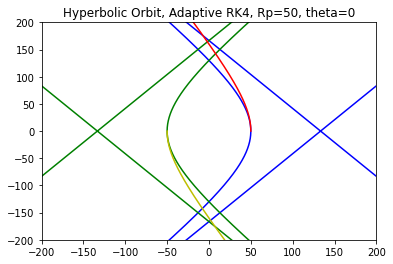

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Hyperbolic Orbit, Adaptive RK4, Rp="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,1),hyperbfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0,t,-1),hyperbfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

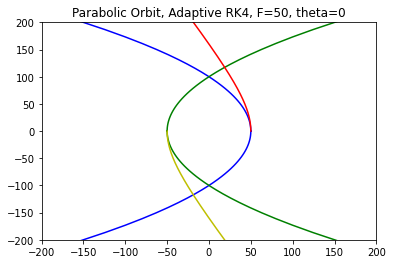

In [19]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5